Cell dibawah ini merupakan cell yang digunakan untuk mengimport library-library yang digunakan seperti:

1. cv2 (OpenCV): Pustaka untuk pemrosesan gambar dan video.
2. numpy: Pustaka untuk operasi numerik dan manipulasi array multidimensi.
matplotlib.pyplot: Pustaka untuk visualisasi data.
3. os: Pustaka untuk interaksi dengan sistem operasi.
4. pandas: Pustaka untuk manipulasi dan analisis data.
5. math: Pustaka untuk fungsi matematika dasar.
6. tqdm: Pustaka untuk membuat progress bar.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import math
import seaborn as sb
from tqdm import tqdm

## DISPLAY IMAGE

Cell di bawah ini digunakan untuk mengakses dan menampilkan citra yang sudah diakses dari label2 yang sudah dimasukkan dimana dilakukan langkah-langkah yaitu: 

1. Pertama, daftar folder yang berisi data gambar didefinisikan dalam list folders. Setiap folder harus berisi gambar-gambar yang berkaitan dengan kelas tertentu. Misalnya, folder "data/Blight" berisi gambar-gambar yang mewakili kelas "Blight".

2. List kosong data dan file_name dibuat untuk menyimpan data gambar dan nama file.

3. Melalui loop for, setiap folder di folders diiterasi.

4. Dalam setiap folder, list file dalam folder tersebut diambil menggunakan os.listdir(folder).

5. Setiap file dalam folder diiterasi menggunakan loop for.

6. Path lengkap untuk setiap file dihasilkan dengan menggabungkan path folder dengan nama file menggunakan os.path.join(folder, file).

7. Nama file dari setiap gambar diambil dengan menggunakan os.path.splitext(file)[0]. Ini menghapus ekstensi file dari nama file.

8. Gambar dibaca menggunakan cv2.imread(img_path) dan disimpan dalam variabel temp.

9. Format warna gambar diubah dari BGR ke RGB menggunakan cv2.cvtColor(temp, cv2.COLOR_BGR2RGB). Model yang umum digunakan dalam pengolahan gambar adalah menggunakan urutan warna RGB.

10. Data gambar yang sudah dikonversi RGB ditambahkan ke list data.

11. Nama file gambar (tanpa ekstensi) ditambahkan ke list file_name.

In [2]:
folders = [
    "data/Blight",
    "data/Common_Rust",
    "data/Gray_Leaf_Spot",
    "data/Healthy",
]

data = []
file_name = []

for folder in folders:
    dataset = os.listdir(folder)
    for file in dataset:
        img_path = os.path.join(folder, file)
        name = os.path.splitext(file)[0]
        temp = cv2.imread(img_path)
        rgb_data = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        data.append(rgb_data)
        file_name.append(name)

Cell di bawah ini digunakan untuk menampilkan salah satu contoh citra yang berada pada index ke 4.

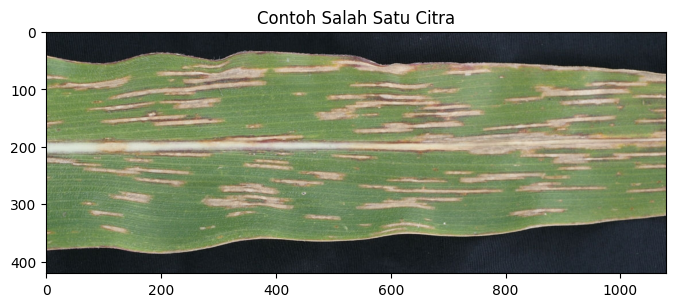

In [3]:
# Tampil contoh citra 1
first_data = data[4]

plt.figure(figsize=(8, 6))
plt.title('Contoh Salah Satu Citra')
plt.imshow(first_data)

## RESIZE IMAGE

Cell di bawah ini digunakan untuk melakukan resize terhadap data di mana langkah-langkahnya yaitu: 

1. List kosong res_data dibuat untuk menyimpan gambar-gambar yang telah diubah ukurannya.

2. Melalui loop for, setiap gambar dalam list data diiterasi menggunakan indeks i.

3. Setiap gambar diubah ukurannya menggunakan cv2.resize(data[i], (256, 256), interpolation=cv2.INTER_NEAREST). Fungsi cv2.resize() mengambil gambar data[i] dan mengubah ukurannya menjadi 256x256 piksel dengan menggunakan metode interpolasi INTER_NEAREST.

4. Gambar yang telah diubah ukurannya disimpan dalam list res_data menggunakan res_data.append(res).


In [4]:
res_data = []
for i in range(len(data)):
    res = cv2.resize(data[i], (256, 256), interpolation=cv2.INTER_NEAREST)
    res_data.append(res)

Cell di bawah ini digunakan untuk menampilkan citra hasil resize yang berada pada index ke 4.

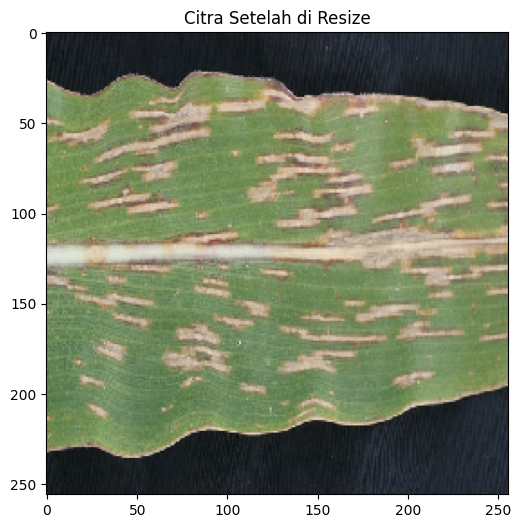

In [5]:
# Tampil contoh citra setelah resize
first_res = res_data[4]

plt.figure(figsize=(8, 6))
plt.title('Citra Setelah di Resize')
plt.imshow(first_res)

Cell di bawah ini digunakan untuk menyimpan citra hasil resize ke dalam folder resize yang ada dalam folder hasil.

In [6]:
savePath = "hasil/resize/"
for i in range(len(res_data)):
    save = savePath + file_name[i] + ".jpg"
    rgb_image = cv2.cvtColor(res_data[i], cv2.COLOR_BGR2RGB)  # Mengubah citra menjadi format warna RGB
    cv2.imwrite(save, rgb_image)

## ROTASI 

Cell di bawah ini merupakan sebuah method untuk melakukan rotasi pada citra dimana dilakukan langkah-langkah yaitu: 

1. Fungsi rotasi memiliki dua parameter yaitu derajat dan citra. derajat adalah sudut rotasi dalam derajat, sedangkan citra adalah gambar yang akan dirotasi.

2. Variabel panjang, lebar, dan _ diisi dengan dimensi panjang, lebar, dan jumlah saluran warna (RGB) dari gambar citra.

3. Membuat array kosong Rotasi_img dengan ukuran yang sama seperti citra untuk menyimpan gambar hasil rotasi.

4. Menghitung sudut rotasi dalam radian dengan mengalikan derajat dengan np.pi / 180.

5. Menghitung titik tengah (tengahx dan tengahy) dari gambar dengan membagi panjang dan lebar dengan 2.

6. Melakukan nested loop for untuk setiap titik piksel pada gambar citra.

7. Menghitung koordinat x dan y setiap piksel dalam gambar citra yang telah dirotasi menggunakan rumus transformasi rotasi.

8. Memeriksa apakah koordinat x dan y berada dalam batas gambar asli (0 <= x < panjang dan 0 <= y < lebar). Jika iya, maka piksel tersebut diambil dari gambar asli dan disimpan dalam Rotasi_img.

9. Mengembalikan gambar Rotasi_img yang telah dirotasi.

In [7]:
def rotasi(derajat, citra):
    panjang, lebar, _ = citra.shape  # Memperoleh dimensi panjang dan lebar citra
    Rotasi_img = np.zeros(citra.shape)

    sudut = derajat * (np.pi / 180)
    tengahx = panjang / 2
    tengahy = lebar / 2

    for i in range(panjang):
        for j in range(lebar):
            x = int((i - tengahx) * np.cos(sudut) - (j - tengahy) * np.sin(sudut) + tengahx)
            y = int((i - tengahx) * np.sin(sudut) + (j - tengahy) * np.cos(sudut) + tengahy)
            if 0 <= x < panjang and 0 <= y < lebar:
                Rotasi_img[i][j] = citra[x][y]

    return Rotasi_img

Dimasukkan sudut rotasi yang diinginkan kemudian ditampilkan setiap hasil rotasi dari citra index ke 4.

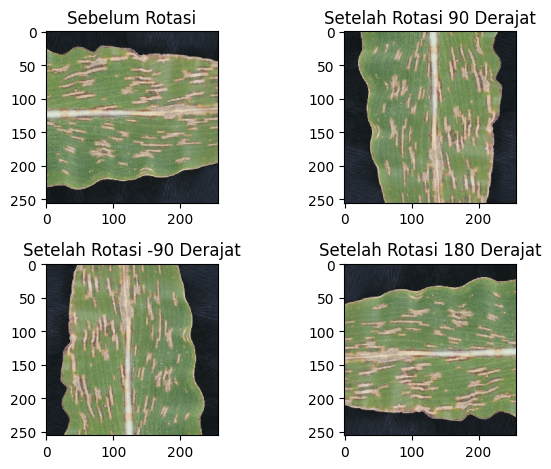

In [8]:
sudut_rotasi = [90, -90, 180]  # Sudut rotasi yang ingin ditampilkan
#index_citra = 4  # Indeks citra yang ingin ditampilkan

# Mengambil citra yang dipilih
citra = res_data[4]

# Menampilkan citra sebelum sharpening
plt.subplot(2, 2, 1)
plt.imshow(citra)
plt.title('Sebelum Rotasi')

# Menampilkan citra dengan sudut rotasi tertentu
for i, sudut in enumerate(sudut_rotasi):
    rotated_image = rotasi(sudut, citra)
    rotated_image = np.clip(rotated_image, 0, 255).astype(np.uint8)  # Memastikan rentang piksel valid [0, 255]
    plt.subplot(2, 2, i+2)
    plt.imshow(rotated_image)
    plt.title(f'Setelah Rotasi {sudut} Derajat')

plt.tight_layout()
plt.show()

Pada cell dibawah ini citra yang disimpan hanyalah citra dengan sudut 90 derajar karena dapat dilihat bahwa citra tersebut menampilkan fitur-fitur pada daun dengan baik kemudian citra disimpan dengan nama file ditambah dengan sudut rotasinya.

In [9]:
savePath = "hasil/rotasi/"  # Ubah path ke folder hasil rotasi sesuai kebutuhan
sudut_rotasi = [90]  # Sudut rotasi yang ingin Anda terapkan
rotasi_data = []  # List untuk menyimpan citra hasil rotasi
for i in range(len(res_data)):
    for sudut in sudut_rotasi:
        # Menerapkan rotasi pada citra
        rgb_image = cv2.cvtColor(res_data[i], cv2.COLOR_BGR2RGB)
        hasil_rotasi = rotasi(sudut, rgb_image)  # Menggunakan sudut rotasi dari daftar sudut_rotasi

        # Menyimpan citra hasil rotasi
        save = savePath + f"{file_name[i]}_{sudut}.jpg"  # Menambahkan sudut rotasi pada nama file
        cv2.imwrite(save, hasil_rotasi)

        # Menyimpan citra hasil rotasi ke dalam list hasil_rotasi_data
        rotasi_data.append(hasil_rotasi)

## SHARPENING

Cell di bawah ini digunakan untuk melakukan sharpening agar citra agar fitur-fitur pada citra dapat terlihat dengan jelas. adapun langkah-langkahnya yaitu: 

1. kernel_sharpening adalah matriks kernel yang digunakan untuk melakukan sharpening pada citra. Matriks ini akan diaplikasikan pada setiap piksel citra.

2. Membuat array kosong sharpened_data untuk menyimpan citra hasil proses sharpening.

3. Melakukan iterasi pada setiap citra dalam rotasi_data.

4. Menggunakan fungsi cv2.filter2D untuk menerapkan filter kernel kernel_sharpening pada citra. src adalah citra yang akan diproses, ddepth adalah tipe kedalaman citra output (-1 menandakan bahwa tipe kedalaman output akan sama dengan citra input), dan kernel adalah matriks kernel yang digunakan.

5. Citra hasil proses sharpening (sharpened_img) akan ditambahkan ke dalam array sharpened_data.

In [10]:
# Proses sharpening pada citra
kernel_sharpening = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

sharpened_data = []
for img in rotasi_data:
    sharpened_img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_sharpening)
    sharpened_data.append(sharpened_img)

Pada cell dibawah ini ditampilkan hasil citra setelah sharpening dan sebelum sharpening agar dapat dilihat hasil perbedaan keduanya.

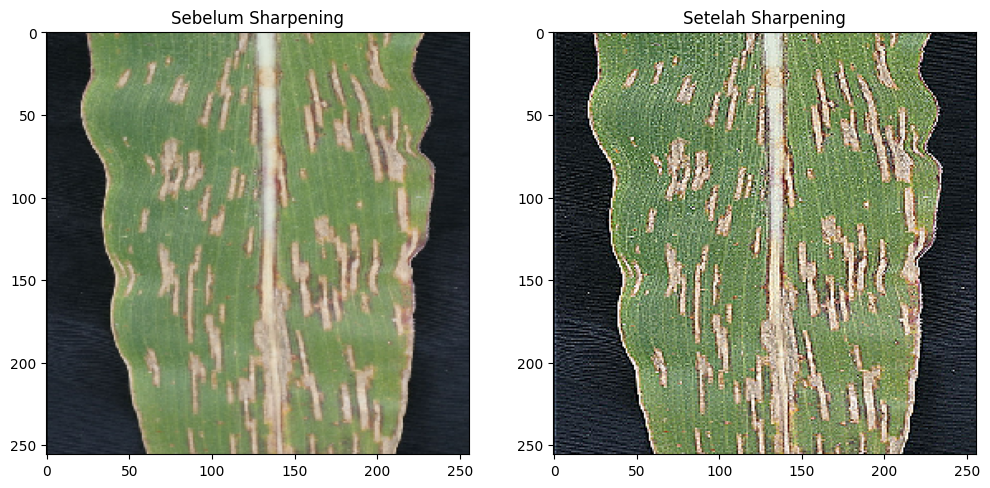

In [13]:
# Menampilkan citra sebelum sharpening
first_data = np.clip(rotasi_data[4], 0, 255).astype(np.uint8)
first_data_rgb = cv2.cvtColor(first_data, cv2.COLOR_BGR2RGB)

# Menampilkan citra setelah sharpening
sharpened_rgb_data = np.clip(sharpened_data[4], 0, 255).astype(np.uint8)
sharpened_rgb_data_rgb = cv2.cvtColor(sharpened_rgb_data, cv2.COLOR_BGR2RGB)

# Menampilkan citra sebelum dan setelah sharpening
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(first_data_rgb)
plt.title('Sebelum Sharpening')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_rgb_data_rgb)
plt.title('Setelah Sharpening')

plt.show()

Hasil citra setelah dilakukan sharpening kemudian akan dimasukkan kedalam folder sharpening yang sudah disediakan.

In [14]:
savePath = "hasil/sharpening/"

for i, img in enumerate(sharpened_data):
    save = savePath + file_name[i] + ".jpg"
    img_rgb = np.clip(img, 0, 255).astype(np.uint8)  # Convert to 8-bit unsigned integer
    img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.imsave(save, img_rgb)


## SEGMENTASI HAPUS BACKGROUND

Cell di bawah ini digunakan untuk menghapus background dari citra dimana digunakan segmentasi berdasarkan warna yang diinginkan. Adapun langkah-langkahnya yaitu: 

1. Konversi citra ke format HSV menggunakan fungsi cv2.cvtColor dengan parameter cv2.COLOR_BGR2HSV. Format HSV digunakan karena memudahkan dalam pemrosesan warna.

2. Tentukan rentang warna untuk setiap jenis bercak yang ingin dihilangkan dari latar belakang. Rentang warna ini ditentukan dalam format HSV.

3. Buat mask untuk setiap jenis bercak menggunakan fungsi cv2.inRange. Fungsi ini akan menghasilkan mask berupa citra biner, di mana piksel dengan warna yang berada dalam rentang warna akan memiliki nilai 255 (putih), sedangkan piksel dengan warna di luar rentang warna akan memiliki nilai 0 (hitam).

4. Gabungkan semua mask menggunakan operasi bitwise OR (cv2.bitwise_or). Tujuan dari langkah ini adalah menggabungkan semua bercak yang ingin dihilangkan menjadi satu mask.

5. Gunakan mask yang telah dibuat untuk menghilangkan latar belakang pada citra asli menggunakan operasi bitwise AND (cv2.bitwise_and). Hasilnya adalah citra dengan latar belakang yang telah dihilangkan.

6. Hasil akhir, yaitu citra dengan latar belakang yang telah dihilangkan, akan dikembalikan sebagai output dari fungsi.


In [15]:
def remove_background(image):
    # Konversi citra ke format HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Tentukan rentang warna untuk bercak kuning
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([40, 255, 255])
    
    # Tentukan rentang warna untuk bercak oranye
    lower_orange = np.array([5, 100, 100])
    upper_orange = np.array([15, 255, 255])
    
    # Tentukan rentang warna untuk bercak putih
    lower_white = np.array([0, 0, 200])
    upper_white = np.array([40, 50, 255])
    
    # Tentukan rentang warna untuk bercak hijau
    lower_green = np.array([30, 50, 50])
    upper_green = np.array([90, 255, 255])
    
    # Tentukan rentang warna untuk bercak cream
    lower_cream = np.array([0, 50, 150])
    upper_cream = np.array([30, 150, 220])
    
    # Tentukan rentang warna untuk bercak coklat
    lower_brown = np.array([10, 50, 50])
    upper_brown = np.array([20, 255, 255])
    
    # Mask untuk bercak kuning
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    
    # Mask untuk bercak oranye
    mask_orange = cv2.inRange(hsv, lower_orange, upper_orange)
    
    # Mask untuk bercak putih
    mask_white = cv2.inRange(hsv, lower_white, upper_white)
    
    # Mask untuk bercak hijau
    mask_green = cv2.inRange(hsv, lower_green, upper_green)
    
    # Mask untuk bercak cream
    mask_cream = cv2.inRange(hsv, lower_cream, upper_cream)
    
    # Mask untuk bercak coklat
    mask_brown = cv2.inRange(hsv, lower_brown, upper_brown)
    
    # Menggabungkan semua mask
    mask = cv2.bitwise_or(mask_yellow, mask_orange)
    mask = cv2.bitwise_or(mask, mask_white)
    mask = cv2.bitwise_or(mask, mask_green)
    mask = cv2.bitwise_or(mask, mask_cream)
    mask = cv2.bitwise_or(mask, mask_brown)
    
    # Menghilangkan latar belakang menggunakan mask
    result = cv2.bitwise_and(image, image, mask=mask)
    
    return result

Cell dibawah ini digunakan untuk menyimpan hasil citra yang sudah dihapus ke dalam array background_removed_data

In [16]:
# Array to store the images with background removed
background_removed_data = []

# Remove background from each image in the array
for img in sharpened_data:
    img_uint8 = np.clip(img, 0, 255).astype(np.uint8)
    result = remove_background(img_uint8)
    img_rgb_data = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    background_removed_data.append(img_rgb_data)

Cell dibawah ini digunakan untuk menampilkan citra setelah dan sebelum dilakukannya penghapusan background.

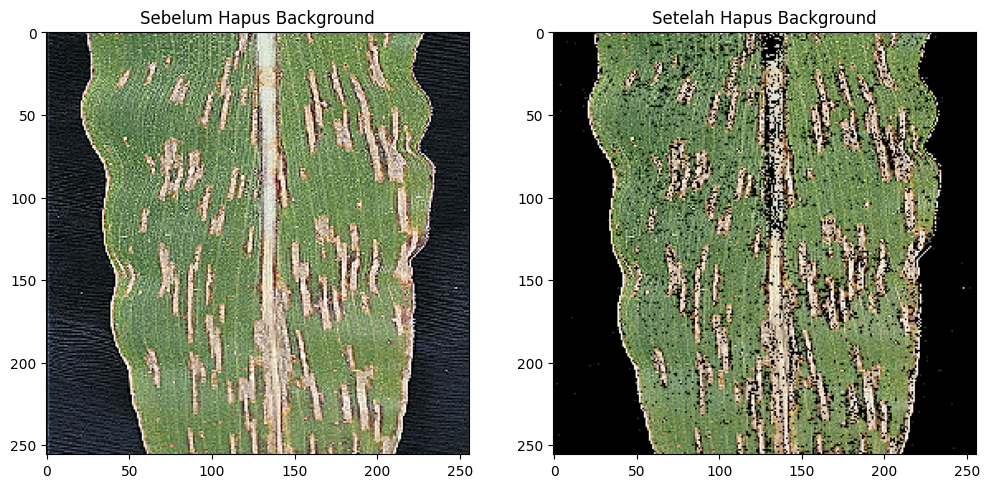

In [17]:
# Menampilkan citra sebelum sharpening
first_data = np.clip(sharpened_data[4], 0, 255).astype(np.uint8)
first_data_rgb = cv2.cvtColor(first_data, cv2.COLOR_BGR2RGB)

# Menampilkan citra setelah sharpening
background_rgb_data = np.clip(background_removed_data[4], 0, 255).astype(np.uint8)
#background_rgb_data_rgb = cv2.cvtColor(background_rgb_data, cv2.COLOR_BGR2RGB)

# Menampilkan citra sebelum dan setelah sharpening
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(first_data_rgb)
plt.title('Sebelum Hapus Background')

plt.subplot(1, 2, 2)
plt.imshow(background_rgb_data)
plt.title('Setelah Hapus Background')

plt.show()

Cell dibawah ini digunakan untuk menyimpan citra yang sudah dihapus backgroundnya kedalam folder hapus background.

In [18]:
save_path = 'hasil/hapus_background/'
for i, img in enumerate(background_removed_data):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Menyusun path dan nama file untuk disimpan
    save = save_path + file_name[i] + ".jpg"
    # Menyimpan citra dalam format RGB
    cv2.imwrite(save, img_rgb)

## MORFOLOGI CITRA

Cell dibawah ini digunakan untuk melakukan proses morfologi citra dimana langkah-langkah yang dilakukan adalah: 

1. Definisikan kernel yang akan digunakan untuk operasi morfologi. Kernel ini didefinisikan sebagai matriks 3x3 dengan elemen-elemen bernilai 1.

2. Inisialisasi array untuk menyimpan hasil morfologi. Array erosi_results digunakan untuk menyimpan hasil operasi erosi, dilasi_results untuk hasil dilasi, opening_results untuk hasil opening, dan closing_results untuk hasil closing.

3. Lakukan operasi morfologi pada setiap citra dalam array background_removed_data menggunakan loop for. Pada setiap iterasi, dilakukan operasi dilasi (cv2.dilate), erosi (cv2.erode), opening (cv2.morphologyEx dengan parameter cv2.MORPH_OPEN), dan closing (cv2.morphologyEx dengan parameter cv2.MORPH_CLOSE). Operasi-operasi ini menggunakan kernel yang telah didefinisikan sebelumnya.

4. Hasil dari setiap operasi morfologi disimpan ke dalam array-array yang telah diinisialisasi sebelumnya.

In [19]:
# Definisikan kernel
kernel = np.ones((3, 3), np.uint8)

# Inisialisasi array untuk menyimpan hasil morfologi
erosi_results = []
dilasi_results = []
opening_results = []
closing_results = []

# Lakukan operasi morfologi pada setiap citra dalam array segmented_data
for image in background_removed_data:
    # Dilasi
    dilated = cv2.dilate(image, kernel, iterations=1)
    
    # Erosi
    eroded = cv2.erode(image, kernel, iterations=1)
    
    # Opening
    opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    
    # Closing
    closed = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    
    # Tambahkan hasil morfologi ke dalam array morphology_results
    erosi_results.append(eroded)
    dilasi_results.append(dilated)
    opening_results.append(opened)
    closing_results.append(closed)


Cell di bawah ini digunakan untuk menampilkan citra hasil morfologi dengan citra dalam index ke 4.

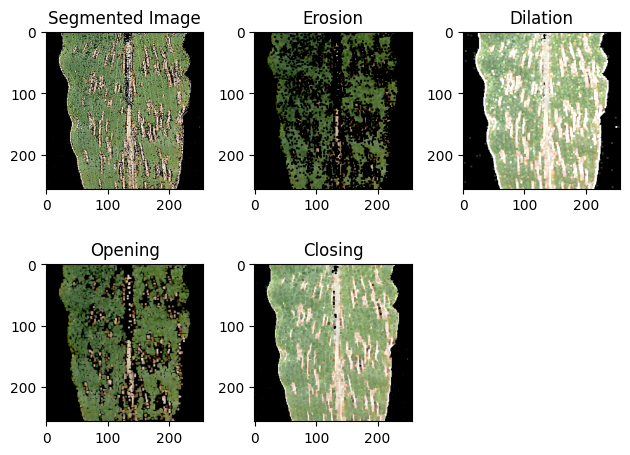

In [20]:
# Memilih indeks citra yang ingin ditampilkan
image_index = 4

# Mengambil citra hasil morfologi dan citra segmented dari indeks yang dipilih
image_segmented = background_removed_data[image_index]
image_erosion = erosi_results[image_index]
image_dilation = dilasi_results[image_index]
image_opening = opening_results[image_index]
image_closing = closing_results[image_index]

# Konversi citra hasil morfologi ke format RGB jika masih dalam format grayscale
image_erosion_rgb = np.uint8(image_erosion)
image_dilation_rgb = np.uint8(image_dilation)
image_opening_rgb = np.uint8(image_opening)
image_closing_rgb = np.uint8(image_closing)

# Menampilkan citra segmented
plt.subplot(2, 3, 1)
plt.imshow(image_segmented)
plt.title('Segmented Image')

# Menampilkan citra hasil morfologi erosi
plt.subplot(2, 3, 2)
plt.imshow(image_erosion_rgb)
plt.title('Erosion')

# Menampilkan citra hasil morfologi dilasi
plt.subplot(2, 3, 3)
plt.imshow(image_dilation_rgb)
plt.title('Dilation')

# Menampilkan citra hasil morfologi opening
plt.subplot(2, 3, 4)
plt.imshow(image_opening_rgb)
plt.title('Opening')

# Menampilkan citra hasil morfologi closing
plt.subplot(2, 3, 5)
plt.imshow(image_closing_rgb)
plt.title('Closing')

plt.tight_layout()
plt.show()


Cell di bawah ini digunakan untuk menyimpan hasil morfologi dimaana citra yang disimpan hanya citra hasil closing karena merupakan hasil yang terbaik untuk diproses selanjutnya

In [21]:
save_path = 'hasil/morfologi/'
for i, img in enumerate(closing_results):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    save = save_path + file_name[i] + ".jpg"
    cv2.imwrite(save, img_rgb)

## SEGMENTASI EDGE DETECTION

Cell di bawah ini digunakan untuk melakukan segmentasi berdasarkan tepinya dimana langkah-langkah yang dilakukan adalah: 

1. Pertama, citra diubah menjadi tipe data uint8 dengan batasan nilai 0 hingga 255 menggunakan fungsi np.clip dan astype(np.uint8). Hal ini dilakukan untuk memastikan bahwa citra memiliki tipe data yang sesuai sebelum dilakukan operasi tepi.

2. Selanjutnya, citra diubah menjadi citra dalam skala abu-abu menggunakan fungsi cv2.cvtColor dengan parameter cv2.COLOR_RGB2GRAY. Citra dalam skala abu-abu adalah citra yang hanya memiliki satu saluran warna (grayscale), sehingga tepi dapat dideteksi dengan lebih baik.

3. Metode Canny digunakan untuk mendeteksi tepi pada citra abu-abu. Fungsi cv2.Canny digunakan dengan parameter threshold[0] dan threshold[1] yang merupakan batasan ambang untuk deteksi tepi.

4. Hasil dari deteksi tepi dalam bentuk citra biner diperoleh dengan menggunakan fungsi cv2.threshold dengan parameter edges (hasil deteksi tepi) dan ambang batas 0. Nilai 255 digunakan sebagai nilai piksel maksimum dalam citra biner.

5. Terakhir, dilakukan operasi bitwise AND antara citra asli dan citra biner tepi menggunakan fungsi cv2.bitwise_and dengan parameter image (citra asli) dan binary_image (citra biner tepi). Hasil dari operasi ini adalah citra hasil segmentasi tepi.

In [22]:
def segment_edge(image, threshold):
    # Ubah tipe data citra menjadi uint8
    image = np.clip(image, 0, 255).astype(np.uint8)

    # Ubah citra ke dalam skala abu-abu
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Deteksi tepi menggunakan metode Canny
    edges = cv2.Canny(gray_image, threshold[0], threshold[1])

    # Konversi citra tepi menjadi citra biner
    _, binary_image = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY)

    # Lakukan operasi bitwise AND antara citra asli dan citra biner tepi
    segmented_image = cv2.bitwise_and(image, image, mask=binary_image)

    return segmented_image

Dalam kode di atas, kita menentukan nilai ambang batas (`threshold_min` dan `threshold_max`) untuk deteksi tepi. Kemudian, dilakukan segmentasi citra menggunakan metode deteksi tepi dengan menggunakan fungsi `segment_edge` yang telah didefinisikan sebelumnya.

Hasil segmentasi tepi dari setiap citra dalam `closing_results` disimpan dalam array `segmented_data`. Dengan menggunakan metode deteksi tepi, kita dapat mengekstraksi tepi dari citra-citra tersebut untuk analisis atau pemrosesan selanjutnya.

In [23]:
# Tentukan nilai treshold untuk deteksi tepi
threshold_min = 100
threshold_max = 200
threshold = (threshold_min, threshold_max)

# Segmentasi citra menggunakan metode deteksi tepi
segmented_data = []

for img in closing_results:
    segmented_img = segment_edge(img, threshold)
    segmented_data.append(segmented_img)

Cell dibawah ini digunakan untuk menampilkan citra setelah dilakukannya segmentasi dan sebelum dilakukannya segmentasi untuk mengetahui perbedaan dari kedua hal tersebut

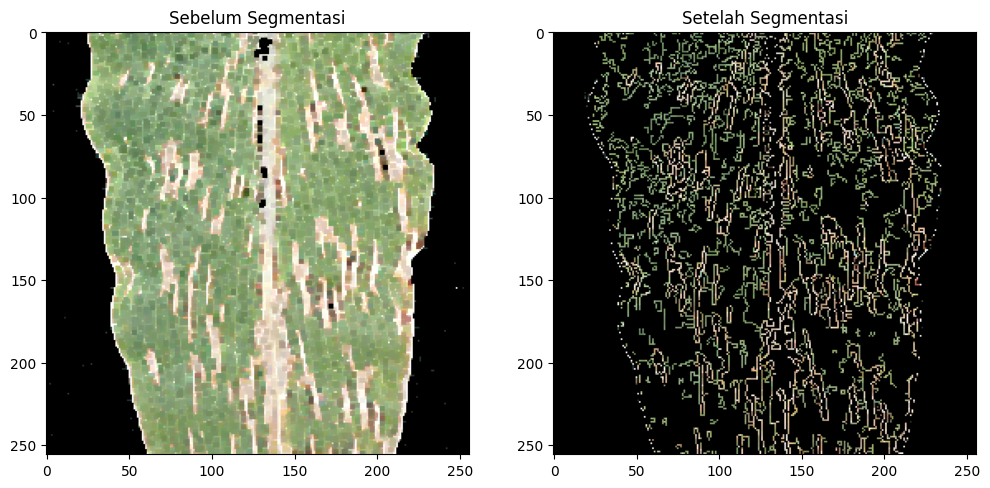

In [24]:
# Menampilkan citra sebelum sharpening
first_data = np.clip(closing_results[4], 0, 255).astype(np.uint8)
#first_data_rgb = cv2.cvtColor(first_data, cv2.COLOR_BGR2RGB)

# Menampilkan citra setelah sharpening
segmented_rgb_data = np.clip(segmented_data[4], 0, 255).astype(np.uint8)
#segmented_rgb_data_rgb = cv2.cvtColor(segmented_rgb_data, cv2.COLOR_BGR2RGB)

# Menampilkan citra sebelum dan setelah sharpening
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(first_data)
plt.title('Sebelum Segmentasi')

plt.subplot(1, 2, 2)
plt.imshow(segmented_rgb_data)
plt.title('Setelah Segmentasi')

plt.show()

Citra hasil segmentasi kemudian akan disimpan kedalam folder segmentasi.

In [25]:
segmentation_save_path = "hasil/segmentasi/"

for i, img in enumerate(segmented_data):
    save = segmentation_save_path + file_name[i] + ".jpg"
    segmented_rgb_data = np.clip(img, 0, 255).astype(np.uint8)
    plt.imsave(save, segmented_rgb_data)

## SHOW ALL PREPROCESSING

Cell di bawah ini digunakan untuk menampilkan semua hasil preprocessing untuk mengetahui perbedaan dari setiap preprocessing yang dilakukan.

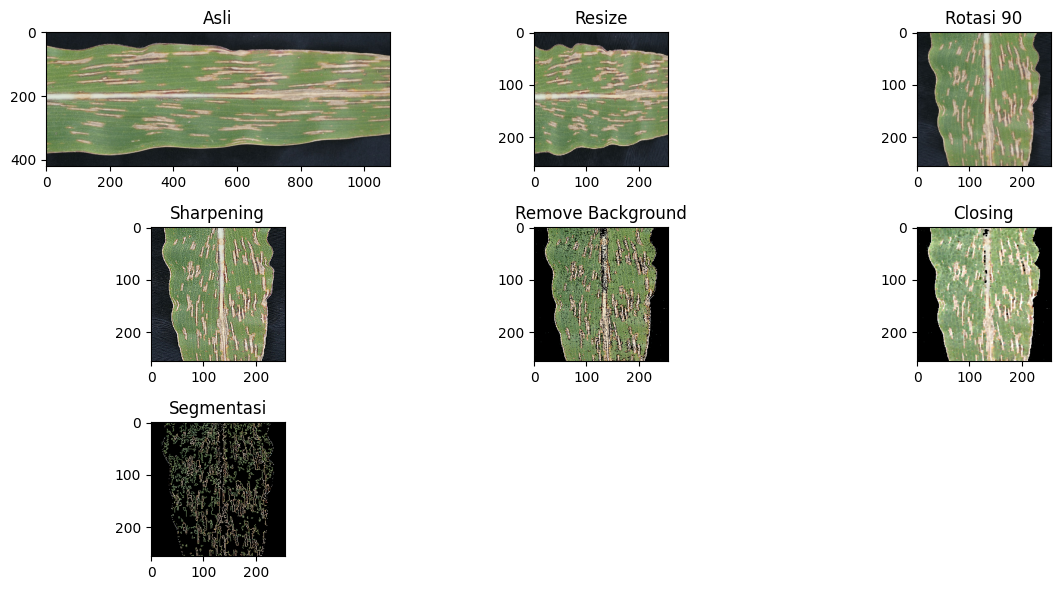

In [26]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 3, 1)
plt.imshow(data[4])
plt.title('Asli')

plt.subplot(3, 3, 2)
plt.imshow(np.clip(res_data[4], 0, 255).astype(np.uint8))
plt.title('Resize')

plt.subplot(3, 3, 3)
rotasi_data_uint8 = np.clip(rotasi_data[4], 0, 255).astype(np.uint8)
rgb_rotasi_data = cv2.cvtColor(rotasi_data_uint8, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_rotasi_data)
plt.title('Rotasi 90')

plt.subplot(3, 3, 4)
sharpened_data_uint8 = np.clip(sharpened_data[4], 0, 255).astype(np.uint8)
rgb_sharpened_data = cv2.cvtColor(sharpened_data_uint8, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_sharpened_data)
plt.title('Sharpening')


plt.subplot(3, 3, 5)
plt.imshow(np.clip(background_removed_data[4], 0, 255).astype(np.uint8))
plt.title('Remove Background')

plt.subplot(3, 3, 6)
plt.imshow(np.clip(closing_results[4], 0, 255).astype(np.uint8))
plt.title('Closing')

plt.subplot(3, 3, 7)
plt.imshow(np.clip(segmented_data[4], 0, 255).astype(np.uint8))
plt.title('Segmentasi')

plt.tight_layout()
plt.show()


## EKSTRAKSI CIRI

Cell di bawah ini digunakan untuk mengakses citra hasil segmentasi untuk dilakukan proses ekstraksi ciri.

In [27]:
folders_hasil = [
    "hasil/segmentasi",
]

data2 = []
labels = [] 
file_name = []

for folder in folders_hasil:
    dataset = os.listdir(folder)
    for file in dataset:
        img_path = os.path.join(folder, file)
        name = os.path.splitext(file)[0]
        temp = cv2.imread(img_path)
        rgb_data2 = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        data2.append(rgb_data2)
        labels.append(folder)
        file_name.append(name)
        
data2 = np.array(data2)
labels = np.array(labels)

cell di bawah ini digunakan untuk menampilkan contoh salah satu citranya.

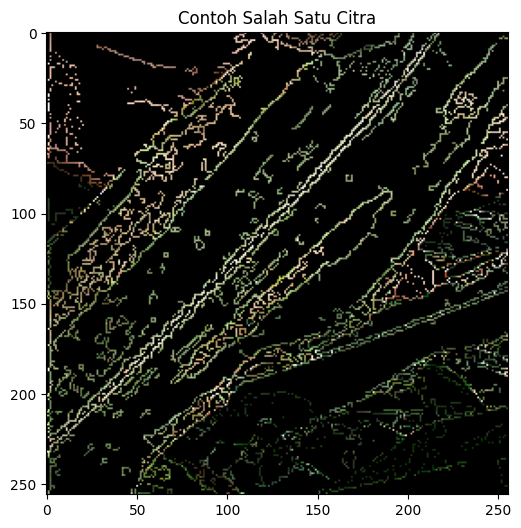

In [28]:
# Tampil contoh citra 1
data_hasil = data2[5]

plt.figure(figsize=(8, 6))
plt.title('Contoh Salah Satu Citra')
plt.imshow(data_hasil)

Fungsi `derajat0` di bawah digunakan untuk menghitung matriks concurrence dengan derajat 0 (pengambilan nilai piksel ke kanan dari piksel asal) dari sebuah citra yang diberikan.

Pada setiap iterasi perulangan, nilai piksel sekarang (`img[i, j]`) dan piksel di sebelah kanannya (`img[i, j+1]`) diambil. Kemudian, matriks concurrence (`imgTmp`) diindeks menggunakan nilai piksel tersebut, dan elemen pada posisi tersebut ditambahkan dengan 1.

Setelah selesai perulangan, dilakukan proses transposisi pada matriks concurrence (`imgTmp`) dengan menggunakan `np.transpose`.

Matriks transpos (`transpos`) dijumlahkan dengan matriks concurrence awal (`imgTmp`) untuk menghasilkan matriks concurrence akhir (`data`).

Dilakukan normalisasi pada matriks concurrence (`data`) dengan membagi setiap elemen dengan jumlah total semua elemen dalam matriks.

In [29]:
def derajat0 (img):

    #mencari nilai terbesar atau tertinggi dari piksel image
    max = np.max(img)

    #membuat array kosong yang nantinya digunakan untuk menampung hasil concurence dari image
    imgTmp = np.zeros([max+1,max+1])

    #looping agar dapat mengolah semua piksel pada gambar
    for i in range (len(img)): #looping untuk kolom
        for j in range(len(img[i])-1): #looping untuk baris

            #menentukan matrik concurence
            #dimana derajat0 berarti pengambilan nilai piksel kekanan dari piksel asal
            #misalkan jika piksel[0,0] = 1 dan piksel[0,1]=3(dikanannnya piksel[0,0]), maka
            #concurence[1,3] akan ditambah 1 dan seterusnya
            imgTmp[img[i,j],img[i,j+1]] +=1

    #mentranpos array hasil concurence
    transpos = np.transpose(imgTmp)

    #menjumlahkan array transpos dengan concurence
    data = imgTmp+transpos

    #membuat var yang nantinya digunakan untuk menyimpan hasil penjumlahan
    tmp = 0
    #normalisasi
    for i in range (len(data)):
        for j in range(len(data)):
            #menambahkan semua piksel pada var data
            tmp+=data[i,j]

    for i in range(len(data)):
        for j in range(len(data)):
            #membagi data dengan hasil penambahan tadi
            data[i,j]/=tmp

    #mengembalikan var data
    return data

Fungsi `derajat45` di bawah digunakan untuk menghitung matriks concurrence dengan derajat 45 (pengambilan nilai piksel ke kanan dari piksel asal) dari sebuah citra yang diberikan.
Pada setiap iterasi perulangan, nilai piksel sekarang (`img[i, j]`) dan piksel di sebelah kanannya (`img[i, j+1]`) diambil. Kemudian, matriks concurrence (`imgTmp`) diindeks menggunakan nilai piksel tersebut, dan elemen pada posisi tersebut ditambahkan dengan 1.

Setelah selesai perulangan, dilakukan proses transposisi pada matriks concurrence (`imgTmp`) dengan menggunakan `np.transpose`.
Matriks transpos (`transpos`) dijumlahkan dengan matriks concurrence awal (`imgTmp`) untuk menghasilkan matriks concurrence akhir (`data`).

Dilakukan normalisasi pada matriks concurrence (`data`) dengan membagi setiap elemen dengan jumlah total semua elemen dalam matriks.

In [30]:
def derajat45 (img):

    #mencari nilai terbesar atau tertinggi dari piksel image
    max = np.max(img)

    #membuat array kosong yang nantinya digunakan untuk menampung hasil concurence dari image
    imgTmp=np.zeros([max+1,max+1])

    #looping agar dapat mengolah semua piksel pada gambar
    for i in range (len (img)-1):
        for j in range (len (img[i])-1):
            imgTmp[img[i+1,j],img[i,j+1]] += 1

    #mentranpos array hasil concurence
    transpos= np.transpose(imgTmp)

    #menjumlahkan array transpos dengan concurence
    data= imgTmp+transpos

    #membuat var yang nantinya digunakan untuk menyimpan hasil penjumlahan
    tmp=0
    #normalisasi
    for i in range (len(data)):
        for j in range (len(data)):
            #menambahkan semua piksel pada var data
            tmp+=data[i,j]

    for i in range (len (data)):
        for j in range (len (data)):
            #membagi data dengan hasil penambahan tadi
            data[i,j]/=tmp
    #mengembalikan var data
    return data

Fungsi `derajat90` di bawah digunakan untuk menghitung matriks concurrence dengan derajat 90 (pengambilan nilai piksel ke kanan dari piksel asal) dari sebuah citra yang diberikan.

Pada setiap iterasi perulangan, nilai piksel sekarang (`img[i, j]`) dan piksel di sebelah kanannya (`img[i, j+1]`) diambil. Kemudian, matriks concurrence (`imgTmp`) diindeks menggunakan nilai piksel tersebut, dan elemen pada posisi tersebut ditambahkan dengan 1.
Setelah selesai perulangan, dilakukan proses transposisi pada matriks concurrence (`imgTmp`) dengan menggunakan `np.transpose`.

Matriks transpos (`transpos`) dijumlahkan dengan matriks concurrence awal (`imgTmp`) untuk menghasilkan matriks concurrence akhir (`data`).

Dilakukan normalisasi pada matriks concurrence (`data`) dengan membagi setiap elemen dengan jumlah total semua elemen dalam matriks.

In [31]:
def derajat90 (img):

    #mencari nilai terbesar atau tertinggi dari piksel image
    max = np.max(img)

    #membuat array kosong yang nantinya digunakan untuk menampung hasil concurence dari image
    imgTmp=np.zeros([max+1,max+1])

    #looping agar dapat mengolah semua piksel pada gambar
    for i in range (len (img)-1):
        for j in range (len (img[i])):
            imgTmp[img[i+1,j],img[i,j]] += 1

    #mentranpos array hasil concurence
    transpos= np.transpose(imgTmp)

    #menjumlahkan array transpos dengan concurence
    data= imgTmp+transpos

    #membuat var yang nantinya digunakan untuk menyimpan hasil penjumlahan
    tmp=0
    #normalisasi
    for i in range (len(data)):
        for j in range (len(data)):
            #menambahkan semua piksel pada var data
            tmp+=data[i,j]

    for i in range (len (data)):
        for j in range (len (data)):
            #membagi data dengan hasil penambahan tadi
            data[i,j]/=tmp
    #mengembalikan var data
    return data

Fungsi `derajat135` di bawah digunakan untuk menghitung matriks concurrence dengan derajat 135 (pengambilan nilai piksel ke kanan dari piksel asal) dari sebuah citra yang diberikan.

 Pada setiap iterasi perulangan, nilai piksel sekarang (`img[i, j]`) dan piksel di sebelah kanannya (`img[i, j+1]`) diambil. Kemudian, matriks concurrence (`imgTmp`) diindeks menggunakan nilai piksel tersebut, dan elemen pada posisi tersebut ditambahkan dengan 1.
Setelah selesai perulangan, dilakukan proses transposisi pada matriks concurrence (`imgTmp`) dengan menggunakan `np.transpose`.

Matriks transpos (`transpos`) dijumlahkan dengan matriks concurrence awal (`imgTmp`) untuk menghasilkan matriks concurrence akhir (`data`).

Dilakukan normalisasi pada matriks concurrence (`data`) dengan membagi setiap elemen dengan jumlah total semua elemen dalam matriks.

In [32]:
def derajat135 (img):

    #mencari nilai terbesar atau tertinggi dari piksel image
    max = np.max(img)

    #membuat array kosong yang nantinya digunakan untuk menampung hasil concurence dari image
    imgTmp=np.zeros([max+1,max+1])
    for i in range (len (img)-1):
        for j in range (len (img[i])-1):
            imgTmp[img[i,j],img[i+1,j+1]] += 1

    #mentranpos array hasil concurence
    transpos= np.transpose(imgTmp)

    #menjumlahkan array transpos dengan concurence
    data= imgTmp+transpos

    #membuat var yang nantinya digunakan untuk menyimpan hasil penjumlahan
    tmp=0
    #normalisasi
    for i in range (len(data)):
        for j in range (len(data)):
            #menambahkan semua piksel pada var data
            tmp+=data[i,j]

    for i in range (len (data)):
        for j in range (len (data)):
            #membagi data dengan hasil penambahan tadi
            data[i,j]/=tmp
    #mengembalikan var data
    return data

Fungsi dissimilarity di bawah digunakan untuk menghitung nilai dissimilarity dari matriks concurrence yang diberikan (data2). 

Melakukan looping untuk setiap elemen dalam matriks concurrence menggunakan dua perulangan nested. Elemen dalam matriks concurrence diakses melalui data2[i, j], dan perulangan pertama berjalan sebanyak jumlah baris (i < len(data2)), sedangkan perulangan kedua berjalan sebanyak jumlah kolom (j < len(data2)).

Pada setiap iterasi perulangan, nilai elemen concurrence (data2[i, j]) ditambahkan dengan selisih antara indeks baris (i) dan indeks kolom (j) (abs(i - j)). Hasil penjumlahan ini kemudian ditambahkan ke variabel simpan.

In [33]:
def dissimilarity(data2):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data2)):
        for j in range(len(data2)):

            #rumus : p(x,y)+|i-j|
            simpan+= data2[i,j]+abs(i-j)
    #mengembalikan nilai var simpan
    return simpan

Fungsi ASM di bawah digunakan untuk menghitung nilai Angular Second Moment (ASM) dari matriks concurrence yang diberikan (data2).

Melakukan looping untuk setiap elemen dalam matriks concurrence menggunakan dua perulangan nested. Elemen dalam matriks concurrence diakses melalui data2[i, j], dan perulangan pertama berjalan sebanyak jumlah baris (i < len(data2)), sedangkan perulangan kedua berjalan sebanyak jumlah kolom (j < len(data2)).

Pada setiap iterasi perulangan, nilai elemen concurrence (data2[i, j]) dipangkatkan dua (pow(data2[i, j], 2)). Hasil pangkatan ini kemudian ditambahkan ke variabel simpan.

In [34]:
def ASM(data2):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data2)):
        for j in range(len(data2)):

            #rumus : p(x,y)^2
            simpan+= pow(data2[i,j],2)
    #mengembalikan nilai var simpan
    return simpan

Fungsi contrast di bawah digunakan untuk menghitung nilai Contrast dari matriks concurrence yang diberikan (data2).

Melakukan looping untuk setiap elemen dalam matriks concurrence menggunakan dua perulangan nested. Elemen dalam matriks concurrence diakses melalui data2[i, j], dan perulangan pertama berjalan sebanyak jumlah baris (i < len(data2)), sedangkan perulangan kedua berjalan sebanyak jumlah kolom (j < len(data2)).

Pada setiap iterasi perulangan, nilai elemen concurrence (data2[i, j]) ditambahkan dengan kuadrat selisih antara i dan j (data2[i, j] + pow(i - j, 2)). Hasil penjumlahan ini kemudian ditambahkan ke variabel simpan.

In [35]:
def contrast(data2):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data2)):
        for j in range(len(data2)):

            #rumus : p(x,y)+(i-j)^2
            simpan+= data2[i,j]+pow(i-j,2)
    #mengembalikan nilai var simpan
    return simpan

Fungsi entropi di bawah digunakan untuk menghitung nilai Entropi dari matriks concurrence yang diberikan (data2).

Melakukan looping untuk setiap elemen dalam matriks concurrence menggunakan dua perulangan nested. Elemen dalam matriks concurrence diakses melalui data2[i, j], dan perulangan pertama berjalan sebanyak jumlah baris (i < len(data2)), sedangkan perulangan kedua berjalan sebanyak jumlah kolom (j < len(data2)).

 Pada setiap iterasi perulangan, dilakukan pengecekan apakah nilai elemen concurrence (data2[i, j]) lebih besar dari 0. Hal ini dilakukan untuk memastikan bahwa logaritma yang dihitung memiliki basis yang valid.

Jika nilai elemen concurrence lebih besar dari 0, maka dilakukan perhitungan -(data2[i, j] * math.log2(data2[i, j])). Rumus tersebut mengalikan nilai elemen concurrence dengan logaritma basis 2 dari nilai elemen concurrence itu sendiri, dan hasilnya dikalikan dengan -1 (untuk mendapatkan nilai negatif).

In [36]:
def entropi(data2):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range(len(data2)):
        for j in range(len(data2)):
            if data2[i,j] > 0:
                #rumus : -(p(x,y)*log^2(i-j)
                simpan+= -(data2[i,j] * math.log2(data2[i,j]))
    #mengembalikan nilai var simpan
    return simpan

Fungsi energy di bawah digunakan untuk menghitung nilai Energy dari matriks concurrence yang diberikan (data2).

Melakukan looping untuk setiap elemen dalam matriks concurrence menggunakan dua perulangan nested. Elemen dalam matriks concurrence diakses melalui data2[i, j], dan perulangan pertama berjalan sebanyak jumlah baris (i < len(data2)), sedangkan perulangan kedua berjalan sebanyak jumlah kolom (j < len(data2)).

pada setiap iterasi perulangan, dilakukan perhitungan pow(data2[i, j], 2). Rumus tersebut mengkuadratkan nilai elemen concurrence (data2[i, j]).

In [37]:
def energy(data2):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data2)):
        for j in range(len(data2)):
            #rumus : sqrt(p(x,y)^2) atau sqrt(ASM)
            simpan+=pow(data2[i,j],2)
    #mengembalikan nilai var simpan
    return simpan

Fungsi homogenitas di bawah digunakan untuk menghitung nilai Homogeneity dari matriks concurrence yang diberikan (data2).

Melakukan looping untuk setiap elemen dalam matriks concurrence menggunakan dua perulangan nested. Elemen dalam matriks concurrence diakses melalui data2[i, j], dan perulangan pertama berjalan sebanyak jumlah baris (i < len(data2)), sedangkan perulangan kedua berjalan sebanyak jumlah kolom (j < len(data2)).

Pada setiap iterasi perulangan, dilakukan perhitungan data2[i, j] / (1 + pow((i - j), 2)). Rumus tersebut membagi nilai elemen concurrence (data2[i, j]) dengan nilai (1 + (i - j)^2).

In [38]:
def homogenitas(data2):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data2)):
        for j in range(len(data2)):
            #rumus : p(x,y)/1+(i-j)^2
            simpan+=data2[i,j]/(1+pow((i-j),2))
    #mengembalikan nilai var simpan
    return simpan

Fungsi correlation di bawah digunakan untuk menghitung nilai Correlation dari matriks concurrence (data2) berdasarkan parameter-parameter yang diberikan.

Melakukan looping untuk setiap elemen dalam matriks concurrence menggunakan dua perulangan nested. Elemen dalam matriks concurrence diakses melalui data2[i, j], dan perulangan pertama berjalan sebanyak jumlah baris (i < len(data2)), sedangkan perulangan kedua berjalan sebanyak jumlah kolom (j < len(data2)).

Pada setiap iterasi perulangan, dilakukan perhitungan ((i - mI) * (j - mJ) * data2[i, j]) / (tI * tJ). Rumus tersebut mengalikan selisih antara i dan mI dengan selisih antara j dan mJ, kemudian hasilnya dikalikan dengan nilai elemen concurrence (data2[i, j]), dan dibagi dengan perkalian tI dan tJ.


In [39]:
def correlation(data2,mI,mJ,tI,tJ):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data2)):
        for j in range(len(data2)):
            simpan+=((i-mI)*(j-mJ)*data2[i,j])/(tI*tJ)
    #mengembalikan nilai var simpan
    return simpan

Fungsi meanI di bawah digunakan untuk menghitung nilai Mean I dari matriks concurrence (data2).

Melakukan looping untuk setiap elemen dalam matriks concurrence menggunakan dua perulangan nested. Elemen dalam matriks concurrence diakses melalui data2[i, j], dan perulangan pertama berjalan sebanyak jumlah baris (i < len(data2)), sedangkan perulangan kedua berjalan sebanyak jumlah kolom (j < len(data2)).

Pada setiap iterasi perulangan, dilakukan perhitungan i * data2[i, j]. Rumus tersebut mengalikan nilai i (indeks baris) dengan nilai elemen concurrence (data2[i, j]).

In [40]:
def meanI(data2):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data2)):
        for j in range(len(data2)):
            simpan+= i * data2[i,j]
    #mengembalikan nilai var simpan
    return simpan

Fungsi meanJ di bawah digunakan untuk menghitung nilai Mean J dari matriks concurrence (data2).

Melakukan looping untuk setiap elemen dalam matriks concurrence menggunakan dua perulangan nested. Elemen dalam matriks concurrence diakses melalui data2[i, j], dan perulangan pertama berjalan sebanyak jumlah baris (i < len(data2)), sedangkan perulangan kedua berjalan sebanyak jumlah kolom (j < len(data2)).

Pada setiap iterasi perulangan, dilakukan perhitungan j * data2[i, j]. Rumus tersebut mengalikan nilai j (indeks kolom) dengan nilai elemen concurrence (data2[i, j]).

In [41]:
def meanJ(data2):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data2)):
        for j in range(len(data2)):
            simpan+= j * data2[i,j]
    #mengembalikan nilai var simpan
    return simpan

Fungsi taoI di bawah digunakan untuk menghitung nilai Tao I dari matriks concurrence (data2) dengan Mean I (mI). 

Melakukan looping untuk setiap elemen dalam matriks concurrence menggunakan dua perulangan nested. Elemen dalam matriks concurrence diakses melalui data2[i, j], dan perulangan pertama berjalan sebanyak jumlah baris (i < len(data2)), sedangkan perulangan kedua berjalan sebanyak jumlah kolom (j < len(data2)).

Pada setiap iterasi perulangan, dilakukan perhitungan pow((i - mI), 2) * data2[i, j]. Rumus tersebut menghitung kuadrat dari selisih antara indeks baris (i) dengan Mean I (mI), kemudian hasilnya dikalikan dengan nilai elemen concurrence (data2[i, j]).

In [42]:
def taoI(data2,mI):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data2)):
        for j in range(len(data2)):
            simpan+= pow((i-mI),2)*data2[i,j]

    #mengakarkan var simpan
    simpan = math.sqrt(simpan)
    #mengembalikan nilai var simpan
    return simpan

Fungsi taoJ di bawah digunakan untuk menghitung nilai Tao J dari matriks concurrence (data2) dengan Mean J (mJ).

Melakukan looping untuk setiap elemen dalam matriks concurrence menggunakan dua perulangan nested. Elemen dalam matriks concurrence diakses melalui data2[i, j], dan perulangan pertama berjalan sebanyak jumlah baris (i < len(data2)), sedangkan perulangan kedua berjalan sebanyak jumlah kolom (j < len(data2)).

Pada setiap iterasi perulangan, dilakukan perhitungan pow((j - mJ), 2) * data2[i, j]. Rumus tersebut menghitung kuadrat dari selisih antara indeks kolom (j) dengan Mean J (mJ), kemudian hasilnya dikalikan dengan nilai elemen concurrence (data2[i, j]).

In [43]:
def taoJ(data2,mJ):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data2)):
        for j in range(len(data2)):
            simpan+= pow((j-mJ),2)*data2[i,j]
    #mengakarkan var simpan
    simpan = math.sqrt(simpan)
    #mengembalikan nilai var simpan
    return simpan

Cell di bawah ini digunakan untuk melihat ukuran dari citra

In [45]:
data2[5].shape

(256, 256, 3)

Cell di bawah ini digunakan untuk mencari piksel di masing-masing derajat.

In [46]:
hasil = []
for i in tqdm(range(len(data2)), desc='load'):
    dat = []
    dat.append(derajat0 (data2[i]))      #mencari piksel derajat0
    dat.append(derajat45 (data2[i]))     #mencari piksel derajat45
    dat.append(derajat90 (data2[i]))     #mencari piksel derajat90
    dat.append(derajat135 (data2[i]))    #mencari piksel derajat135
    hasil.append(dat)

load: 100%|██████████| 644/644 [45:30<00:00,  4.24s/it] 


Kode di bawah digunakan untuk menghitung berbagai fitur tekstur (energy, homogenitas, entropi, contrast, dissimilarity, ASM, dan correlation) dari setiap matriks citra dalam hasil dan menyimpannya dalam frame.

Melakukan iterasi pada setiap matriks citra dalam hasil menggunakan tqdm untuk menampilkan progress bar dengan deskripsi "load".

Memanggil fungsi-fungsi fitur tekstur (energy, homogenitas, entropi, contrast, dissimilarity, ASM, dan correlation) untuk matriks citra j dan menyimpan hasilnya dalam variabel-variabel yang sesuai (en, hm, ent, con, dis, asm, dan cor). Menambahkan hasil fitur tekstur yang telah dihitung ke dalam save menggunakan save.append().

Setelah selesai iterasi pada semua matriks citra dalam hasil, frame akan berisi hasil fitur tekstur dari semua citra.

In [47]:
frame = []
indeks = 0 #digunakan untuk menentukan indeks dari nama filenya
for i in tqdm(hasil, desc='load'):
    save = []
    #untuk menginputkan nama dari file
    save.append(file_name[indeks])
    indeks+=1
    for j in i:

        #memanggil fungsi energy
        en = energy(j)
        #menginputkan kedalam var save
        save.append(en)

        #memanggil fungsi homogenitas
        hm = homogenitas(j)
        #menginputkan kedalam var save
        save.append(hm)

        #memanggil fungsi entropi
        ent = entropi(j)
        #menginputkan kedalam var save
        save.append(ent)

        #memanggil fungsi contrast
        con = contrast(j)
        #menginputkan kedalam var save
        save.append(con)

        #memanggil fungsi dissimilarity
        dis = dissimilarity(j)
        #menginputkan kedalam var save
        save.append(dis)

        #memanggil fungsi ASM
        asm = ASM(j)
        #menginputkan kedalam var save
        save.append(asm)

        mI = meanI(j)
        mJ = meanJ(j)
        tI = taoI(j,mI)
        tJ = taoJ(j,mJ)

        #memanggil fungsi correlation
        cor = correlation(j,mI,mJ,tI,tJ)
        #menginputkan kedalam var save
        save.append(cor)

    #menginputkan isi var save ke var frame
    frame.append(save)

load: 100%|██████████| 644/644 [33:28<00:00,  3.12s/it]


Dalam kode di atas, kita membuat variabel `headerPass` yang berisi daftar nama kolom yang akan digunakan sebagai header dalam tabel. Nama kolom tersebut mencakup beberapa fitur seperti energi, homogenitas, entropy, kontras, dissimilarity, ASM, dan korelasi dengan sudut rotasi tertentu.

Selanjutnya, kita menggunakan variabel `frame` yang berisi data untuk menginisialisasi DataFrame `df` menggunakan pandas. Kolom-kolom dalam DataFrame `df` akan menggunakan nama kolom yang telah ditentukan dalam `headerPass`.

DataFrame `df` akan digunakan untuk menyimpan hasil ekstraksi fitur citra yang nantinya dapat digunakan untuk analisis atau pemrosesan selanjutnya.

In [48]:
#membuat var yang nantinya digunakan sebagai header
headerPass = ['path','energi0','homogenitas0','entropy0','contras0','dissimilarity0','ASM0','correlation0'
            ,'energi45','homogenitas45','entropy45','contras45','dissimilarity45','ASM45','correlation45'
            ,'energi90','homogenitas90','entropy90','contras90','dissimilarity90','ASM90','correlation90'
            ,'energi135','homogenitas135','entropy135','contras135','dissimilarity135','ASM135','correlation135']
#menginputkan var frame sebagai isi dari tabel
df = pd.DataFrame(frame, columns=headerPass)

Cell di bawah ini digunakan untuk membuat satu kolom baru kemudian data yang ada dalam dataframe akan disimpan kedalam file finalresult_ekstraksiciri.csv dalam bentuk csv.

In [49]:
#digunakan untuk mensave data menjadi file csv dengan nama finalresult_ekstraksiciri
df['labels'] = labels
df.to_csv(r'finalresult_ekstraksiciri.csv', index=False)

Cell dibawah ini digunaka untuk menampilkan seluruh dtaa yang tersimpan di dalam dataframe

In [50]:
df

path   energi0  homogenitas0  entropy0      contras0  \
0      segmented_0  0.290874      0.573061  5.325581  7.158170e+08   
1      segmented_1  0.629532      0.812736  2.731297  7.158170e+08   
2     segmented_10  0.434162      0.711180  4.531033  7.158170e+08   
3    segmented_100  0.226599      0.523268  6.146970  7.158170e+08   
4    segmented_101  0.166901      0.472659  6.924220  7.158170e+08   
..             ...       ...           ...       ...           ...   
639   segmented_95  0.287324      0.579354  5.522072  7.158170e+08   
640   segmented_96  0.366025      0.636600  4.820161  7.158170e+08   
641   segmented_97  0.337273      0.607755  4.897607  7.158170e+08   
642   segmented_98  0.290319      0.610429  5.800862  7.158170e+08   
643   segmented_99  0.223331      0.531654  6.229203  7.158170e+08   

     dissimilarity0      ASM0  correlation0  energi45  homogenitas45  ...  \
0      5.592321e+06  0.290874      0.021191  0.284839       0.543279  ...   
1      5.592321e+06  0.629532      0.204613  0.597523       0.775583  ...   
2      5.592321e+06  0.434162      0.420438  0.362731       0.604682  ...   
3      5.592321e+06  0.226599      0.088029  0.208391       0.467244  ...   
4      5.592321e+06  0.166901      0.033471  0.148221       0.396464  ...   
..              ...       ...           ...       ...            ...  ...   
639    5.592321e+06  0.287324      0.058895  0.268833       0.526739  ...   
640    5.592321e+06  0.366025      0.118536  0.354263       0.603171  ...   
641    5.592321e+06  0.337273      0.058937  0.317514       0.567380  ...   
642    5.592321e+06  0.290319      0.259331  0.235211       0.492244  ...   
643    5.592321e+06  0.223331      0.145850  0.192964       0.448229  ...   

        ASM90  correlation90  energi135  homogenitas135  entropy135  \
0    0.355441       0.381557   0.281048        0.537828    5.419794   
1    0.636090       0.374726   0.615750        0.788874    2.810077   
2    0.372628       0.019093   0.358541        0.601086    4.722526   
3    0.246290       0.252387   0.207689        0.465209    6.241330   
4    0.184466       0.220286   0.144589        0.390279    7.051314   
..        ...            ...        ...             ...         ...   
639  0.323518       0.335967   0.269373        0.526695    5.651050   
640  0.397532       0.289354   0.349185        0.596696    4.919663   
641  0.372512       0.288362   0.329891        0.580557    4.977784   
642  0.247801       0.031595   0.227918        0.483279    5.949688   
643  0.215611       0.045471   0.192910        0.447456    6.316701   

       contras135  dissimilarity135    ASM135  correlation135  \
0    7.158170e+08      5.592321e+06  0.281048       -0.034166   
1    7.158170e+08      5.592321e+06  0.615750        0.156804   
2    7.158170e+08      5.592321e+06  0.358541       -0.043541   
3    7.158170e+08      5.592321e+06  0.207689       -0.014161   
4    7.158170e+08      5.592321e+06  0.144589       -0.088762   
..            ...               ...       ...             ...   
639  7.158170e+08      5.592321e+06  0.269373       -0.014225   
640  7.158170e+08      5.592321e+06  0.349185        0.036530   
641  7.158170e+08      5.592321e+06  0.329891        0.066370   
642  7.158170e+08      5.592321e+06  0.227918       -0.086990   
643  7.158170e+08      5.592321e+06  0.192910       -0.067324   

               labels  
0    hasil/segmentasi  
1    hasil/segmentasi  
2    hasil/segmentasi  
3    hasil/segmentasi  
4    hasil/segmentasi  
..                ...  
639  hasil/segmentasi  
640  hasil/segmentasi  
641  hasil/segmentasi  
642  hasil/segmentasi  
643  hasil/segmentasi  

[644 rows x 30 columns]

## Penggunaan Model

In [3]:
dataframe = pd.read_csv('finalresult_ekstraksiciri.csv')
dataframe.head()

path   energi0  homogenitas0  entropy0      contras0  \
0    segmented_0  0.290874      0.573061  5.325581  7.158170e+08   
1    segmented_1  0.629532      0.812736  2.731297  7.158170e+08   
2   segmented_10  0.434162      0.711180  4.531033  7.158170e+08   
3  segmented_100  0.226599      0.523268  6.146970  7.158170e+08   
4  segmented_101  0.166901      0.472659  6.924220  7.158170e+08   

   dissimilarity0      ASM0  correlation0  energi45  homogenitas45  ...  \
0       5592321.0  0.290874      0.021191  0.284839       0.543279  ...   
1       5592321.0  0.629532      0.204613  0.597523       0.775583  ...   
2       5592321.0  0.434162      0.420438  0.362731       0.604682  ...   
3       5592321.0  0.226599      0.088029  0.208391       0.467244  ...   
4       5592321.0  0.166901      0.033471  0.148221       0.396464  ...   

      ASM90  correlation90  energi135  homogenitas135  entropy135  \
0  0.355441       0.381557   0.281048        0.537828    5.419794   
1  0.636090       0.374726   0.615750        0.788874    2.810077   
2  0.372628       0.019093   0.358541        0.601086    4.722526   
3  0.246290       0.252387   0.207689        0.465209    6.241330   
4  0.184466       0.220286   0.144589        0.390279    7.051314   

     contras135  dissimilarity135    ASM135  correlation135            labels  
0  7.158170e+08      5.592321e+06  0.281048       -0.034166  hasil/segmentasi  
1  7.158170e+08      5.592321e+06  0.615750        0.156804  hasil/segmentasi  
2  7.158170e+08      5.592321e+06  0.358541       -0.043541  hasil/segmentasi  
3  7.158170e+08      5.592321e+06  0.207689       -0.014161  hasil/segmentasi  
4  7.158170e+08      5.592321e+06  0.144589       -0.088762  hasil/segmentasi  

[5 rows x 30 columns]

In [7]:
clean_data = dataframe.replace({
    'Blight': 0,
    'Common_Rust': 1,
    'Gray_Leaf_Spot': 2,
    'Healthy': 3
})
clean_data.head()

path   energi0  homogenitas0  entropy0      contras0  \
0    segmented_0  0.290874      0.573061  5.325581  7.158170e+08   
1    segmented_1  0.629532      0.812736  2.731297  7.158170e+08   
2   segmented_10  0.434162      0.711180  4.531033  7.158170e+08   
3  segmented_100  0.226599      0.523268  6.146970  7.158170e+08   
4  segmented_101  0.166901      0.472659  6.924220  7.158170e+08   

   dissimilarity0      ASM0  correlation0  energi45  homogenitas45  ...  \
0       5592321.0  0.290874      0.021191  0.284839       0.543279  ...   
1       5592321.0  0.629532      0.204613  0.597523       0.775583  ...   
2       5592321.0  0.434162      0.420438  0.362731       0.604682  ...   
3       5592321.0  0.226599      0.088029  0.208391       0.467244  ...   
4       5592321.0  0.166901      0.033471  0.148221       0.396464  ...   

      ASM90  correlation90  energi135  homogenitas135  entropy135  \
0  0.355441       0.381557   0.281048        0.537828    5.419794   
1  0.636090       0.374726   0.615750        0.788874    2.810077   
2  0.372628       0.019093   0.358541        0.601086    4.722526   
3  0.246290       0.252387   0.207689        0.465209    6.241330   
4  0.184466       0.220286   0.144589        0.390279    7.051314   

     contras135  dissimilarity135    ASM135  correlation135            labels  
0  7.158170e+08      5.592321e+06  0.281048       -0.034166  hasil/segmentasi  
1  7.158170e+08      5.592321e+06  0.615750        0.156804  hasil/segmentasi  
2  7.158170e+08      5.592321e+06  0.358541       -0.043541  hasil/segmentasi  
3  7.158170e+08      5.592321e+06  0.207689       -0.014161  hasil/segmentasi  
4  7.158170e+08      5.592321e+06  0.144589       -0.088762  hasil/segmentasi  

[5 rows x 30 columns]

In [8]:
len(clean_data.columns)

30

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF

# Mengambil subset kolom yang relevan untuk x dan y
x = clean_data.iloc[:, :-1].select_dtypes(include=['number'])
y = clean_data.iloc[:, -1]

# Pembagian data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Penyesuaian skala pada data latih dan data uji
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
# Daftar model dan nama model
names = ["K-Nearest Neighbors", "Linear SVM"]
classifiers = [
    KNeighborsClassifier(5),
    SVC(gamma=2, C=1),
]

## Analisis Hasil Prediksi